In [2]:
!pip freeze

graphviz==0.20.3
joblib==1.4.2
numpy==2.1.2
pydot==3.0.2
pyparsing==3.2.0
scikit-learn==1.5.2
scipy==1.14.1
threadpoolctl==3.5.0


In [3]:
!python -V

Python 3.12.0


In [4]:
%%time
# imports
import os
import time
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import layers, models

CPU times: total: 0 ns
Wall time: 0 ns


In [5]:
%%time
# read in data and preprocess
images_path = './data/archive/asl_alphabet_train/asl_alphabet_train/'
images = []

for directory in os.listdir(images_path):
    for file in os.listdir(images_path+directory):
        file_path = images_path+directory+'/'+file
        image = Image.open(file_path)
        image = image.convert('L') # convert to grayscale
        image = image.resize((128, 128)) # resize
        # image.save('./data/resized/'+file) # uncomment to save the resized image
        image = np.array(image) # convert to array
        image = image / 255.0 # normalize
        images.append((directory, image))

x = [image[1] for image in images]
y = [image[0] for image in images]

CPU times: total: 2min 37s
Wall time: 14min 53s


In [6]:
%%time
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train = np.array(x_train)
x_test = np.array(x_test)


# binarize the labels
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(69600, 128, 128)
(69600, 29)
(17400, 128, 128)
(17400, 29)
CPU times: total: 1min
Wall time: 1min 29s


In [7]:
%%time
model = models.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(29, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

C:\Users\calif\Desktop\DataMining\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 335s 753ms/step - accuracy: 0.2064 - loss: 2.7501 - val_accuracy: 0.7616 - val_loss: 0.8836
Epoch 2/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 308s 707ms/step - accuracy: 0.6356 - loss: 1.1068 - val_accuracy: 0.8935 - val_loss: 0.4025
Epoch 3/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 318s 698ms/step - accuracy: 0.7687 - loss: 0.6755 - val_accuracy: 0.9316 - val_loss: 0.2337
Epoch 4/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 329s 757ms/step - accuracy: 0.8334 - loss: 0.4751 - val_accuracy: 0.9715 - val_loss: 0.1297
Epoch 5/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 499s 1s/step - accuracy: 0.8684 - loss: 0.3721 - val_accuracy: 0.9747 - val_loss: 0.0925
Epoch 6/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 526s 1s/step - accuracy: 0.8906 - loss: 0.3100 - val_accuracy: 0.9828 - val_loss: 0.0690
Epoch 7/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 389s 895ms/step - accuracy: 0.9055 - loss: 0.2685 - val_accuracy: 0.9848 - val_loss: 0.0583
Epoch 8/30
435/435 ━━━━━━━━━━━━━━━━━━━━ 305s 702ms/step - accuracy: 0.9210 - loss:

# Performance Graph

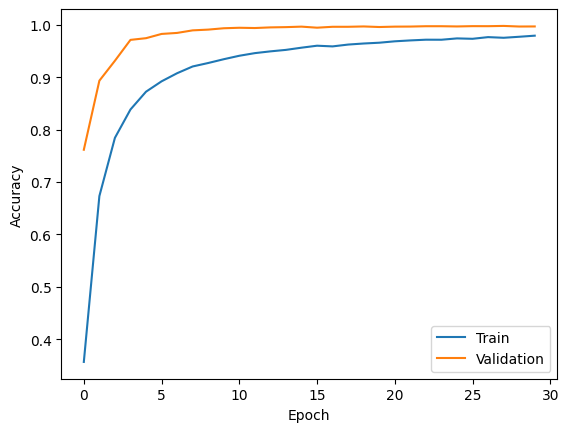

In [8]:
# plot model performance
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Loss and Accuracy measures

In [9]:
# print results of test data ran through model
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(test_loss)
print(test_accuracy)

544/544 ━━━━━━━━━━━━━━━━━━━━ 47s 85ms/step - accuracy: 0.9974 - loss: 0.0092
0.010612613521516323
0.9968391060829163


In [10]:
classes = { 0: "A",
            1: "B",
            2: "C",
            3: "D",
            4: "del",
            5: "E",
            6: "F",
            7: "G",
            8: "H",
            9: "I",
            10: "J",
            11: "K",
            12: "L",
            13: "M",
            14: "N",
            15: "nothing",
            16: "O",
            17: "P",
            18: "Q",
            19: "R",
            20: "S",
            21: "space",
            22: "T",
            23: "U",
            24: "V",
            25: "W",
            26: "X",
            27: "Y",
            28: "Z",
            }

# Confusion Matrix

544/544 ━━━━━━━━━━━━━━━━━━━━ 46s 84ms/step


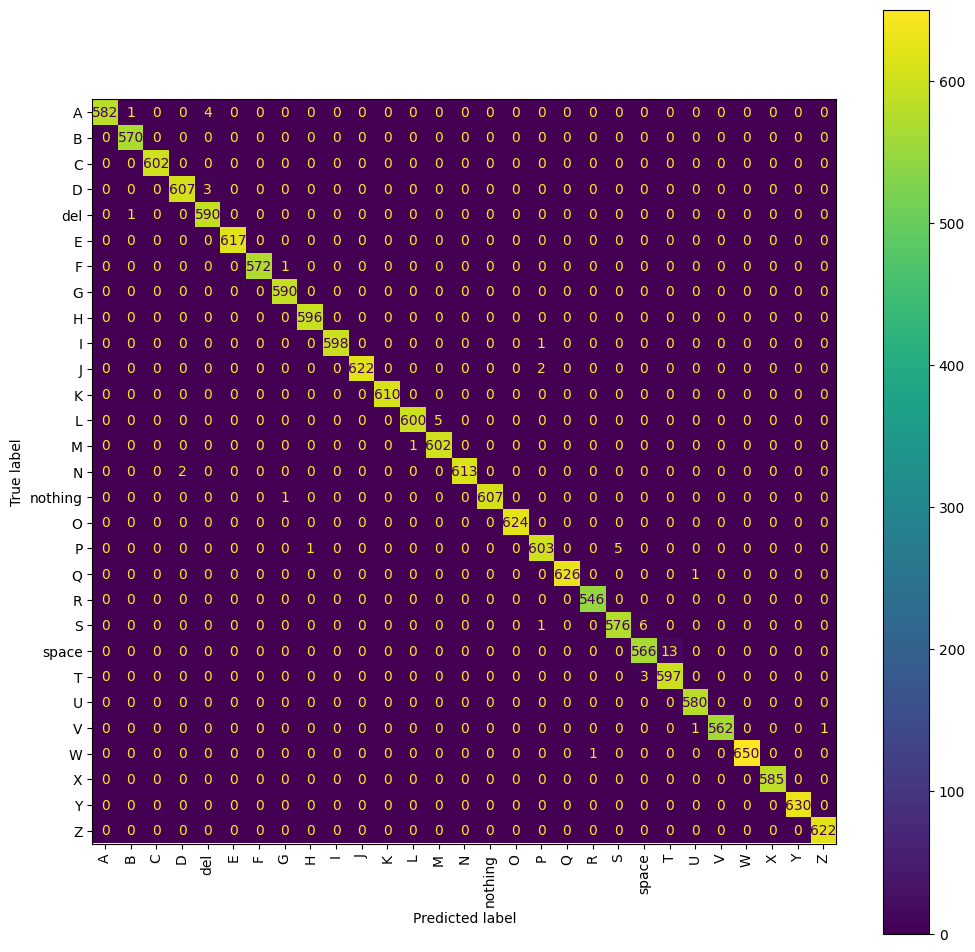

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes.values())
disp.plot( values_format='d', ax=plt.gca())
plt.xticks(rotation=90)
plt.show()

# Classification Report

In [12]:
 print(classification_report(y_true, y_pred_classes, target_names= classes.values())) 

              precision    recall  f1-score   support

           A       1.00      0.99      1.00       587
           B       1.00      1.00      1.00       570
           C       1.00      1.00      1.00       602
           D       1.00      1.00      1.00       610
         del       0.99      1.00      0.99       591
           E       1.00      1.00      1.00       617
           F       1.00      1.00      1.00       573
           G       1.00      1.00      1.00       590
           H       1.00      1.00      1.00       596
           I       1.00      1.00      1.00       599
           J       1.00      1.00      1.00       624
           K       1.00      1.00      1.00       610
           L       1.00      0.99      1.00       605
           M       0.99      1.00      1.00       603
           N       1.00      1.00      1.00       615
     nothing       1.00      1.00      1.00       608
           O       1.00      1.00      1.00       624
           P       0.99    

## If model seems good, save it with the following cell

In [13]:
# save model and lebal binarizer with date and time
from datetime import datetime
keras_model_save_name = './keras_saves/' + datetime.now().strftime("%Y-%m-%d_%H-%M-%S") + '.keras'
label_binarizer_save_name = './binarizer/' + datetime.now().strftime("%Y-%m-%d_%H-%M-%S") + '.pkl'
joblib.dump(label_binarizer, label_binarizer_save_name) # save label binarizer
model.save(keras_model_save_name) # save keras model

## The following cells are not needed for the research portion. They will only be used when we decide what model is best after research

In [14]:
model_name_to_export = 'Example'

In [15]:
# load trained model
from tensorflow.keras.models import load_model
load_name ='./keras_saves/' +  model_name_to_export + '.keras'
model = load_model(load_name, compile=False) 
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 8)         │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │           4,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,293,741 (12.56 MB)

 Trainable params: 3,293,741 (12.56 MB)

 Non-trainable params: 0 (0.00 B)

None
You must install pydot (`pip install pydot`) for `plot_model` to work.


In [16]:
# export model
model.export('./model_exports/')

INFO:tensorflow:Assets written to: ./model_exports/assets


INFO:tensorflow:Assets written to: ./model_exports/assets


Saved artifact at './model_exports/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 29), dtype=tf.float32, name=None)
Captures:
  2029233034768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2029233038416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2029233038800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2029233034384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2029233038608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2029233037648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2029233034000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2029233036688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2029233036496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2029233030928: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [17]:
# load exported model
import tensorflow as tf
reloaded_artifact = tf.saved_model.load('./model_exports/')
print(reloaded_artifact.signatures)


_SignatureMap({'serve': <ConcreteFunction (*, input_layer_1: TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='input_layer_1')) -> Dict[['output_0', TensorSpec(shape=(None, 29), dtype=tf.float32, name='output_0')]] at 0x1D87A491BB0>, 'serving_default': <ConcreteFunction (*, input_layer_1: TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name='input_layer_1')) -> Dict[['output_0', TensorSpec(shape=(None, 29), dtype=tf.float32, name='output_0')]] at 0x1D877C78140>})


In [18]:
# prepocess test image
# test_img_path = './data/archive/asl_alphabet_test/asl_alphabet_test/L_test.jpg'
test_img_path = './data/test/test4.jpeg'
og_image = Image.open(test_img_path)
image = og_image.convert('L') # convert to grayscale
image = image.resize((128, 128)) # resize
image = np.array(image) # convert to array
image = image / 255.0 # normalize
image_array = np.expand_dims(image, axis=-1) 
image_array = np.expand_dims(image_array, axis=0) 


In [19]:
# predict test image
predictions = reloaded_artifact.serve(image_array)
rounded = np.round(predictions)
b_load_name = './binarizer/' + model_name_to_export + '.pkl'
label_binarizer = joblib.load(b_load_name) 
original_label = label_binarizer.inverse_transform(rounded)
print(original_label)

['O']
